<a href="https://colab.research.google.com/github/antonisapostoloudis/1st-Assignment-Machine-Learning/blob/main/1st_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# 1.Φόρτωση δεδομένων και περιγραφή στατιστικών


In [4]:
df = pd.read_csv('diabetes.csv')
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Ιστόγραμμα για κάθε χαρακτηριστικό


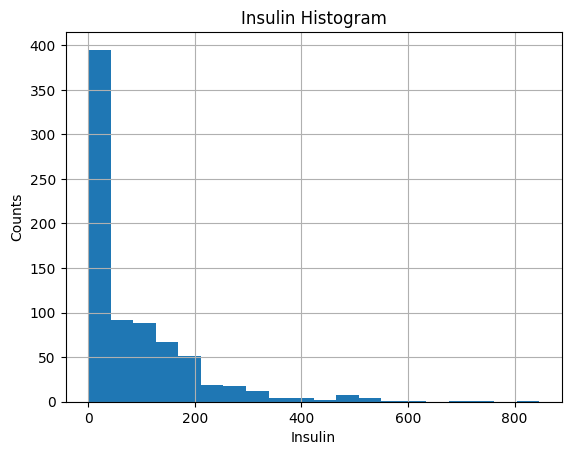

In [5]:
df['Insulin'].hist(bins=20)
plt.title('Insulin Histogram')
plt.xlabel('Insulin')
plt.ylabel('Counts')
plt.show()

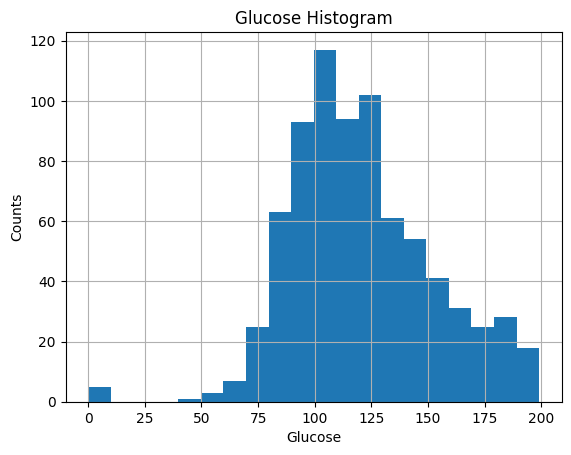

In [6]:
df['Glucose'].hist(bins=20)
plt.title('Glucose Histogram')
plt.xlabel('Glucose')
plt.ylabel('Counts')
plt.show()

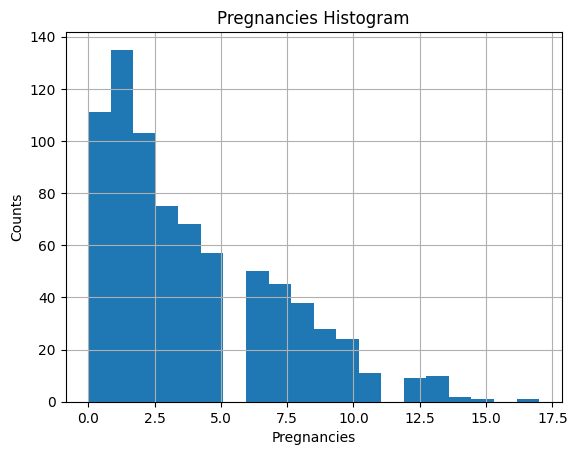

In [7]:
df['Pregnancies'].hist(bins=20)
plt.title('Pregnancies Histogram')
plt.xlabel('Pregnancies')
plt.ylabel('Counts')
plt.show()

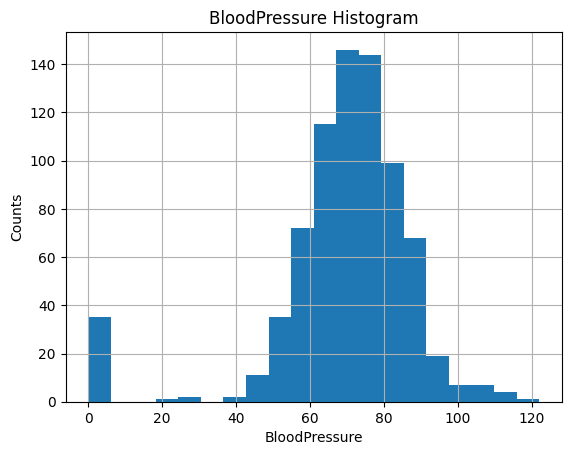

In [8]:
df['BloodPressure'].hist(bins=20)
plt.title('BloodPressure Histogram')
plt.xlabel('BloodPressure')
plt.ylabel('Counts')
plt.show()

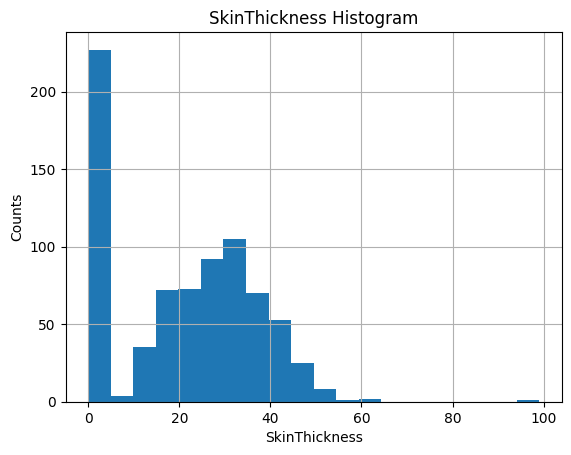

In [9]:
df['SkinThickness'].hist(bins=20)
plt.title('SkinThickness Histogram')
plt.xlabel('SkinThickness')
plt.ylabel('Counts')
plt.show()

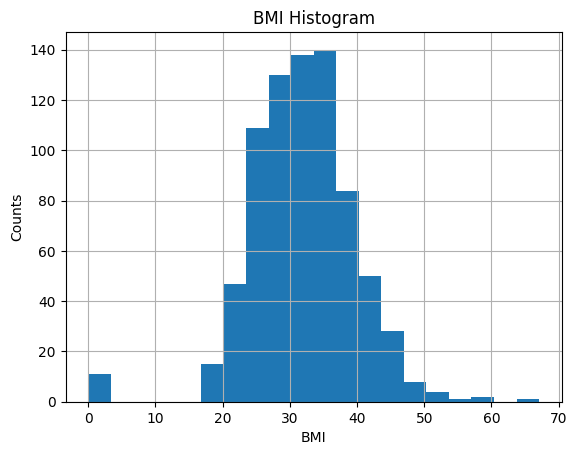

In [10]:
df['BMI'].hist(bins=20)
plt.title('BMI Histogram')
plt.xlabel('BMI')
plt.ylabel('Counts')
plt.show()

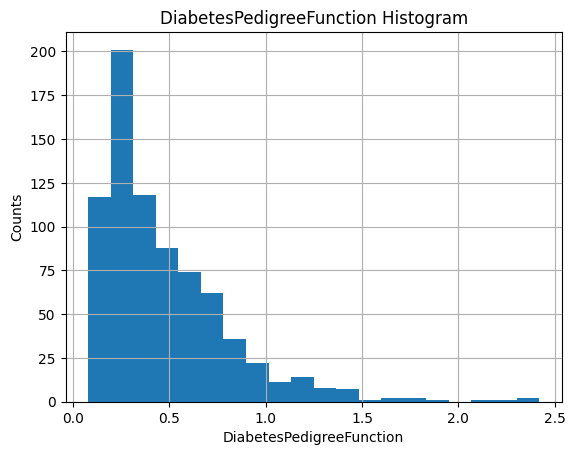

In [11]:
df['DiabetesPedigreeFunction'].hist(bins=20)
plt.title('DiabetesPedigreeFunction Histogram')
plt.xlabel('DiabetesPedigreeFunction')
plt.ylabel('Counts')
plt.show()

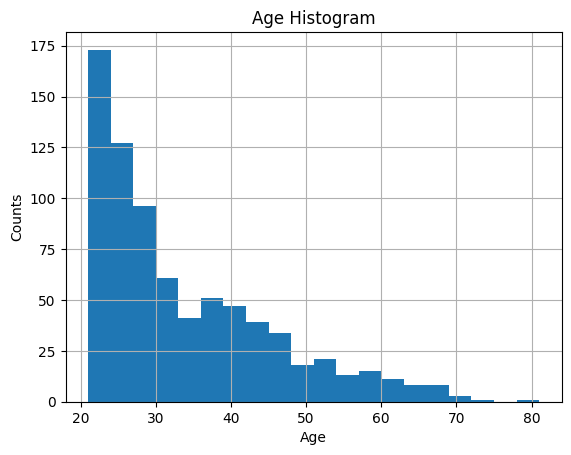

In [12]:
df['Age'].hist(bins=20)
plt.title('Age Histogram')
plt.xlabel('Age')
plt.ylabel('Counts')
plt.show()

# Ραβδόγραμμα για Outcome

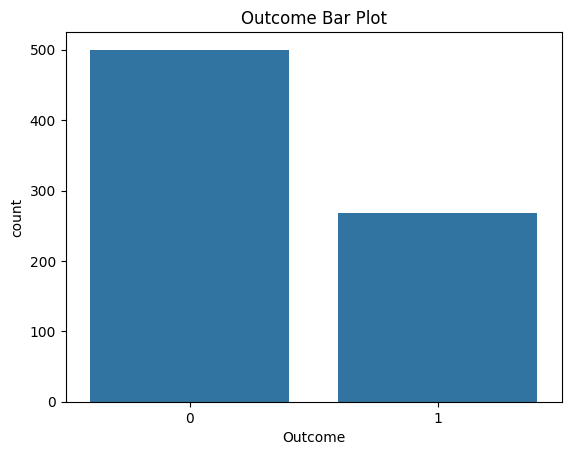

In [13]:

sns.countplot(x='Outcome', data=df)
plt.title('Outcome Bar Plot')
plt.show()


# 2.Ποιότητα Δεδομένων


Εξετάζοντας προσεκτικά το σύνολο δεδόμενων, τόσο από την στατιστική περιγραφή των χαρακτηριστικών,όσο και με την βοήθεια των ιστογραμμάτων για κάθε χαρακτηριστικό, παρατηρούμε τα εξής:
1. Τα χαρακτηριστικά BMI,BloodPressure,Glucose,Insulin περιέχουν δείγματα που παρουσιάζουν μηδενικές τιμές(δεν είναι δυνατόν κάποιος να έχει δείκτη μάζας σώματος ή επίπεδο γλυκόζης ίσο με μηδέν),γεγονός που μπορεί να οδηγήσει σε παραπλανητικά στατιστικά αποτελέσματα και μειωμένη αξιοπιστία των μοντέλων πρόβλεψης.
2. Τα χαρακτηριστικά Insulin,SkinThickness,Age καθώς και το Outcome δεν παρουσιάζουν ομοιόμορφη κατανομή. Αυτό σημαίνει ότι τα δεδομένα μπορεί να είναι μη αντιπροσωπευτικά του πληθυσμού, προκαλώντας μεροληψία στην πρόβλεψη μειώνοντας την γενικευσιμότητα των συμπερασμάτων.

# 3.Κατανομή της μεταβλητής Age

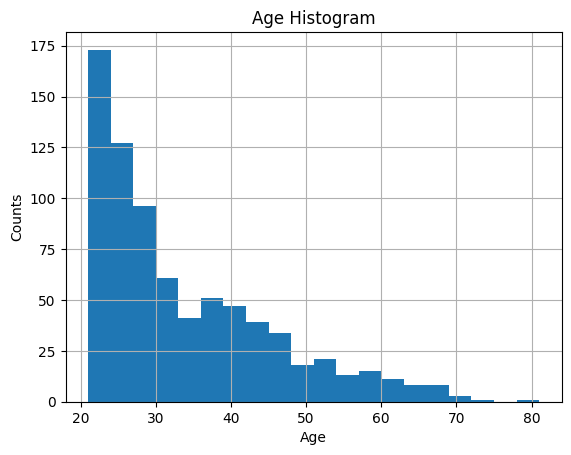

In [14]:
df['Age'].hist(bins=20)
plt.title('Age Histogram')
plt.xlabel('Age')
plt.ylabel('Counts')
plt.show()

Όπως ανέφερα και στο προηγούμενο ερώτημα, η μεταβλητή Age δεν ακολουθεί ομοιόμορφη κατανομή, καθώς το μεγαλύτερο ποσοστό των παραδειγμάτων ανήκουν στο εύρος ηλικίας 20-30, ενώ η εκπροσώπηση απο μεγαλύτερες ηλικιακές ομάδες είναι ελάχιστη. Αυτό μπορεί να οδηγήσει σε μειωμένη ακρίβεια των προβλέψεων για τις μεγαλύτερες ηλικιακές ομάδες, οι οποίες διατρέχουν και τον μεγαλύτερο κίνδυνο για εμφάνιση διαβήτη, συνεπώς η κατανομή δεν είναι κατάλληλη για την εφαρμογή της συγκεκριμένης εφαρμογής.

# 4.Σχέση γλυκόζης και διαβήτη


Παρακάτω παρατηρούμε ότι ο μέσος όρος της γλυκόζης είναι σημαντικά υψηλότερος για αυτούς που έχουν διαβήτη(Outcome=1), συγκριτικά με αυτούς που δεν έχουν. Επομένως τα δεδομένα επιβεβαιώνουν αυτήν την κλινική παρατήρηση.

In [15]:
print(df.groupby('Outcome')['Glucose'].mean())

Outcome
0    109.980000
1    141.257463
Name: Glucose, dtype: float64


# 5.Δημιουργία Numpy arrays με inputs (x) και targets (y)

In [16]:
input_df = df.drop(columns=['Outcome'])
targets_df = df['Outcome']

x = input_df.to_numpy()
y = targets_df.to_numpy()
x.shape, y.shape


((768, 8), (768,))

#

Train Samples: 691
Test Samples: 77

# Χωρισμός του συνόλου δεδομένων σε σύνολα εκπαίδευσης-επικύρωσης και εμφάνιση πλήθους παραδειγμάτων

In [17]:
seed = 0
test_size = 0.3

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
x_train.shape, y_train.shape, x_test.shape, y_test.shape
print(len(x_train))
print(len(x_test))

537
231


# 6.Δημιουργία ταξινομητή Λογιστικής Παλινδρόμησης

In [18]:
model = LogisticRegression(max_iter=1000, random_state=seed)

# Εκπαίδευση ταξινομητή στο σύνολο εκπαίδευσης

In [19]:
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

# Πρόβλεψη μοντέλου στο test και train set

In [20]:
y_pred = model.predict(x_test)
y_train_pred= model.predict(x_train)

#Υπολογισμός ακρίβειας στα σύνολα train και test





In [21]:
accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = round(accuracy*100, 2)

print(f'The test accuracy of the model is: {accuracy_percentage}')

accuracy = accuracy_score(y_train, y_train_pred)
accuracy_percentage = round(accuracy*100, 2)

print(f'The train accuracy of the model is: {accuracy_percentage}')

The test accuracy of the model is: 77.92
The train accuracy of the model is: 76.54


Παραπάνω παρατηρούμε πως το train accuracy είναι πιο χαμηλό από το test accuracy, αν και αυτό δεν είναι το συνηθισμένο. Ωστόσο υπάρχουν και περιπτώσεις που παρουσιάζεται το αντίθετο. Συνήθως οφείλεται σε τυχαία διακύμανση, ή διαφορές στην κατανομή των δεδομένων.

# 7.Ακρίβεια ανά ομάδα ηλικιών

Δημιουργία Dataframe που θα περιέχει τις ομάδες ηλικίας στα δεδομένα

In [22]:
x_test_df = pd.DataFrame(x_test, columns=input_df.columns)
x_test_df['y_true'] = y_test
x_test_df['y_pred'] = y_pred


x_test_df['AgeGroup'] = pd.cut(
    x_test_df['Age'],
    bins=[0, 25, 50, 100],
    labels=['0-25', '25-50', '>50']
)

Υπολογισμός ακρίβειας ανά ηλικιακή ομάδα

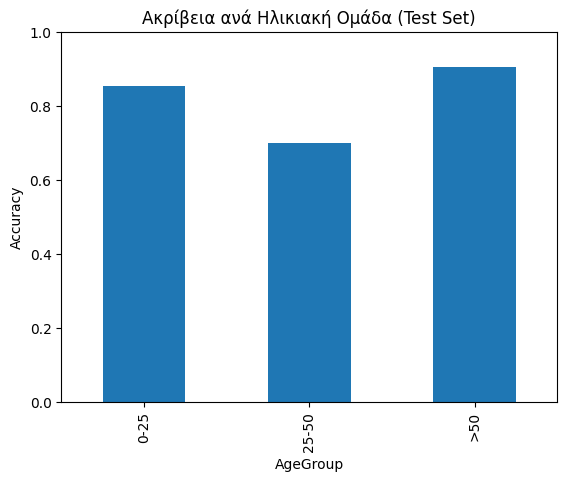

In [23]:
x_test_df['correct'] = (x_test_df['y_true'] == x_test_df['y_pred']).astype(int)

accuracy_per_age = x_test_df.groupby('AgeGroup', observed=True)['correct'].mean()
accuracy_per_age.plot(kind='bar')
plt.title('Ακρίβεια ανά Ηλικιακή Ομάδα (Test Set)')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

# 8.Καλύτερα false positive ή false negative;

Στη συγκεκριμένη εφαρμογή πρόβλεψης διαβήτη, το πιο σοβαρό σφάλμα για τον ταξινομητή είναι να προβλέπει ότι ένας ασθενής δεν έχει διαβήτη, ενώ στην πραγματικότητα έχει. Δηλαδή, το σφάλμα τύπου False Negative θεωρείται πιο επικίνδυνο από το αντίθετο (False Positive).

Ο λόγος είναι ότι, αν το μοντέλο δεν ανιχνεύσει έγκαιρα την ύπαρξη διαβήτη, ο ασθενής δεν θα λάβει την απαραίτητη ιατρική παρακολούθηση ή θεραπεία, κάτι που μπορεί να οδηγήσει σε επιδείνωση της κατάστασής του και σε σοβαρές επιπλοκές, όπως καρδιακά προβλήματα ή νεφρική ανεπάρκεια.

Αντίθετα, στην περίπτωση ενός False Positive, δηλαδή όταν το μοντέλο προβλέψει λανθασμένα ότι κάποιος έχει διαβήτη ενώ δεν έχει, η συνέπεια είναι πολύ λιγότερο σοβαρή. Ο ασθενής πιθανότατα θα υποβληθεί σε περαιτέρω ιατρικές εξετάσεις, οι οποίες θα επιβεβαιώσουν ότι δεν υπάρχει πρόβλημα. Παρότι αυτό μπορεί να προκαλέσει πρόσκαιρη ανησυχία ή επιπλέον κόστος, δεν εγκυμονεί κίνδυνο για την υγεία του.

Συνολικά, για την εφαρμογή αυτή είναι σημαντικό ο ταξινομητής να ελαχιστοποιεί τα False Negatives, ώστε να μη χάνονται πραγματικά περιστατικά διαβήτη. Αυτό σημαίνει πως η ευαισθησία (recall) του μοντέλου είναι πιο κρίσιμη από την απόλυτη ακρίβεια (precision), καθώς προέχει η σωστή αναγνώριση των ασθενών που πράγματι πάσχουν.

# 9.Υπολογισμός με διαφορετικά seeds

In [24]:
accuracies=[]
for i in range(10):
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=i)
  model = LogisticRegression(max_iter=1000, random_state=i)
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  accuracy = accuracy_score(y_test, y_pred)
  accuracy_percentage = round(accuracy*100, 2)
  accuracies.append(accuracy_percentage)
  print(accuracies)


[77.92]
[77.92, 78.35]
[77.92, 78.35, 74.89]
[77.92, 78.35, 74.89, 75.32]
[77.92, 78.35, 74.89, 75.32, 80.95]
[77.92, 78.35, 74.89, 75.32, 80.95, 78.35]
[77.92, 78.35, 74.89, 75.32, 80.95, 78.35, 76.62]
[77.92, 78.35, 74.89, 75.32, 80.95, 78.35, 76.62, 77.92]
[77.92, 78.35, 74.89, 75.32, 80.95, 78.35, 76.62, 77.92, 77.92]
[77.92, 78.35, 74.89, 75.32, 80.95, 78.35, 76.62, 77.92, 77.92, 74.46]


# Μέσος όρος και τυπική απόκλιση των διαφορετικών ακριβειών

In [25]:
mean_accuracy = np.mean(accuracies)
std_accuracy = np.std(accuracies)
print(f"Mean accuracy: {mean_accuracy}")
print(f"Standart deviation: {std_accuracy}")

Mean accuracy: 77.27
Standart deviation: 1.8689087725194093


# 10.Κανονικοποίηση των δεδομένων


In [26]:
scaler=MinMaxScaler()

x_normalized=scaler.fit_transform(input_df)
x_normalized_df = pd.DataFrame(x_normalized, columns=input_df.columns)
x_normalized_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000


# Σημαντικότητα χαρακτηριστικών

The larger the absolute weight value, the better

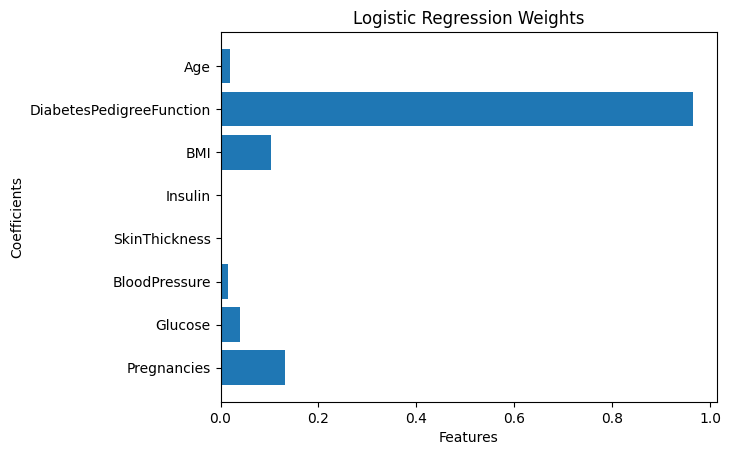

In [27]:
coeffs = model.coef_[0]
importance_weights = np.abs(coeffs)
plt.barh(input_df.columns, importance_weights)
plt.title('Logistic Regression Weights')
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.show()

Οι 3 πιο σημαντικοί παράγοντες που επηρεάζουν την πρόβλεψη του διαβήτη είναι οι DiabetesPedigreeFunction,BMI και το Pregnancies.

Ο δείκτης DiabetesPedigreeFunction αποτυπώνει τη γενετική προδιάθεση ενός ατόμου για διαβήτη· όσο υψηλότερη είναι η τιμή του, τόσο μεγαλύτερη είναι η πιθανότητα εμφάνισης της νόσου. Ο BMI (Δείκτης Μάζας Σώματος) σχετίζεται με την παχυσαρκία, η οποία αποτελεί γνωστό παράγοντα κινδύνου για διαβήτη τύπου 2. Τέλος, ο αριθμός των Pregnancies (εγκυμοσυνών) φαίνεται επίσης να επηρεάζει την πιθανότητα, καθώς γυναίκες που είχαν περισσότερες εγκυμοσύνες ενδέχεται να έχουν αυξημένο μεταβολικό φορτίο και συνεπώς μεγαλύτερο κίνδυνο εμφάνισης διαβήτη.

Συνολικά, οι παράγοντες αυτοί φαίνεται να έχουν τη μεγαλύτερη συμβολή στη διαμόρφωση των προβλέψεων του μοντέλου, κάτι που ευθυγραμμίζεται και με τα ευρήματα ιατρικών μελετών για τους βασικούς κινδύνους ανάπτυξης διαβήτη.

# 2.1 Φόρτωμα δεδομένων και χωρισμός σε train και test



In [51]:
x=df[['Pregnancies','BloodPressure','BMI','Age']].values
y=df['Glucose'].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)


# 2.2 Γραμμική Παλινδρόμηση

In [52]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)


# Υπολογισμός ακρίβειας

In [53]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Mean Squared Error: {mae}")



Mean Squared Error: 929.8883492746899
Mean Squared Error: 23.599990462075155


Η καταλληλότερη μετρική είναι η Mean Absolute Error (MAE),
επειδή είναι πιο ανθεκτική σε ακραίες τιμές που μπορεί να υπάρχουν σε συγκεκριμένους ασθενείς και δίνει μια πιο αξιόπιστη μέτρηση του μέσου σφάλματος στην πρόβλεψη των επιπέδων γλυκόζης.
Αντίθετα, η MSE είναι πιο ευαίσθητη σε outliers και μπορεί να παραπλανήσει ως προς τη συνολική απόδοση του μοντέλου.

# 2.3 Υπολογισμός με Lasso


In [57]:
from sklearn.linear_model import Lasso

alphas=[0.2, 0.4, 0.6, 0.8, 1.0]
accuracies=[]
for alpha in alphas:
  model=Lasso(alpha=alpha)
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  mae=mean_absolute_error(y_test,y_pred)
  accuracies.append(mae)

results=pd.DataFrame({'alphas':alphas,'mae':accuracies})
print(results)

   alphas        mae
0     0.2  23.594203
1     0.4  23.588415
2     0.6  23.582629
3     0.8  23.576843
4     1.0  23.571058


# 2.4 Γραμμική Παλινδρόμηση με αφαίρεση χαρακτηριστικού

In [68]:
x = df[['Pregnancies', 'BloodPressure', 'BMI', 'Age']]
y = df['Glucose']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=0)
model=LinearRegression()
model.fit(x_train,y_train)
coeffs = pd.Series(model.coef_, index=x.columns)
print("Συντελεστές (βαρύτητες):")
print(coeffs)

min_feature = coeffs.abs().idxmin()
print(f"\nΧαρακτηριστικό με τη μικρότερη βαρύτητα: {min_feature}")

x_reduced = x.drop(columns=[min_feature])
x_train2, x_test2, y_train2, y_test2 = train_test_split(
    x_reduced, y, test_size=test_size, random_state=0
)

model2 = LinearRegression()
model2.fit(x_train2, y_train2)

# 9️⃣ Πρόβλεψη και υπολογισμός MAE και για τα δύο μοντέλα
y_pred1 = model.predict(x_test)
y_pred2 = model2.predict(x_test2)

mae1 = mean_absolute_error(y_test, y_pred1)
mae2 = mean_absolute_error(y_test2, y_pred2)

print(f"\nMAE αρχικού μοντέλου: {mae1:.3f}")
print(f"MAE χωρίς το '{min_feature}': {mae2:.3f}")

Συντελεστές (βαρύτητες):
Pregnancies     -0.168193
BloodPressure    0.040810
BMI              0.942079
Age              0.768379
dtype: float64

Χαρακτηριστικό με τη μικρότερη βαρύτητα: BloodPressure

MAE αρχικού μοντέλου: 23.600
MAE χωρίς το 'BloodPressure': 23.616


To BloodPressure είναι το χαρακτηριστικό με τη μικρότερη βαρύτητα, επειδή ο συντελεστής του είναι 0.041, που είναι μικρότερος σε σύγκριση με τα άλλα χαρακτηριστικά. Αυτό σημαίνει ότι το χαρακτηριστικό BloodPressure έχει πολύ μικρή επίδραση στην ακρίβεια του μοντέλου, και το μοντέλο μπορεί να λειτουργεί εξίσου καλά χωρίς αυτό το χαρακτηριστικό. Η μικρή αλλαγή στην ακρίβεια(0.016) υποδεικνύει ότι μπορούμε να το αφαιρέσουμε χωρίς να χάσουμε σημαντική πληροφορία.